In [1]:
import matplotlib.pyplot as plt
import pandas as pd

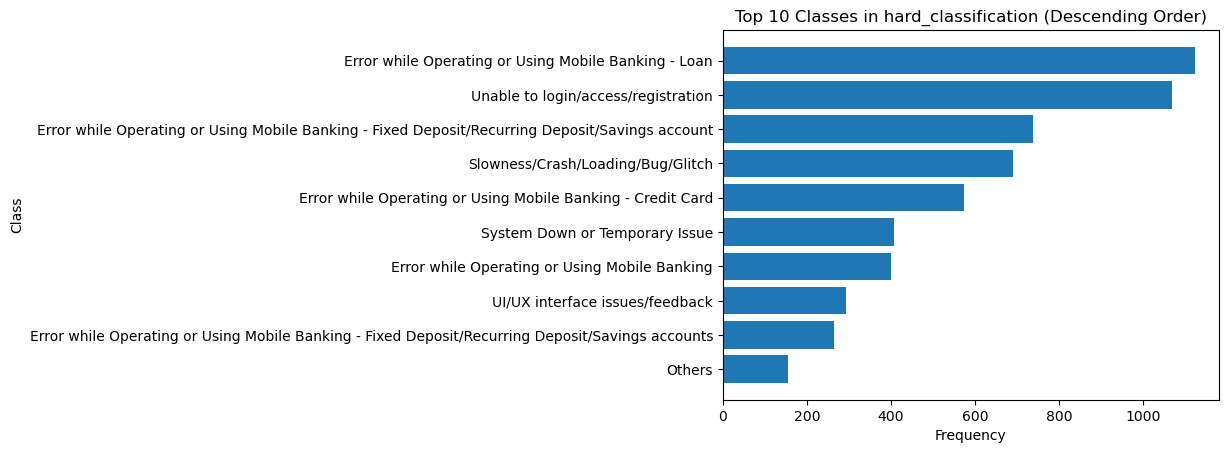

In [7]:
df = pd.read_excel("result/optimised_reviews.xlsx")

# Count the frequency of each class in the 'hard_classification' column
class_counts = df['hard_classification'].value_counts()

# Sort the classes by frequency in descending order
class_counts_sorted = class_counts.sort_values(ascending=True)

# Select the top 10 classes
top_10_classes = class_counts_sorted.tail(10)

# Create a horizontal bar plot
plt.barh(top_10_classes.index, top_10_classes.values)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.title('Top 10 Classes in hard_classification (Descending Order)')

# Show the plot
plt.show()

In [8]:
# Sort the classes by frequency in descending order
class_counts_sorted = class_counts.sort_values(ascending=False)

# Get the top 3 classes
top_3_classes = class_counts_sorted.index[:3].tolist()

print(top_3_classes)

['Error while Operating or Using Mobile Banking - Loan', 'Unable to login/access/registration', 'Error while Operating or Using Mobile Banking - Fixed Deposit/Recurring Deposit/Savings account']


In [27]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

# Load the Excel file
data = pd.read_excel('result/optimised_reviews.xlsx')

# Get the top 3 most frequent categories
top_categories = data['hard_classification'].value_counts().nlargest(3).index.tolist()

# Filter the data for the top 3 categories
top_categories_data = data[data['hard_classification'].isin(top_categories)]

# Get the date range for the last 6 months
last_6_months = datetime.now() - timedelta(days=24 * 30)
last_6_months_data = top_categories_data[top_categories_data['datetime'] >= last_6_months]

# Group by month and count the occurrences for each category
monthly_counts = last_6_months_data.groupby([pd.Grouper(key='datetime', freq='M'), 'hard_classification']).size().reset_index(name='Num_Occurrences')

# Create the time series line graph
fig = px.line(monthly_counts, x='datetime', y='Num_Occurrences', color='hard_classification', title='Time Series - Top 3 Categories')

# Configure hover template to display count and date
fig.update_traces(hovertemplate='Count: %{y}<br>Date: %{x}')

# Update layout properties
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3),
    height=600,  # Update the graph height
    width=900,   # Update the graph width
)

# Display the time series line graph
fig.show()